<h1>ML<h1>
Task 1

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import seaborn as sns
import numpy as np
%matplotlib inline

### Read the data

In [2]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
cdf = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
sales = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
full=df[['SalePrice','LotArea', 'BedroomAbvGr','FullBath' ,'HalfBath' ,'BsmtFullBath','BsmtHalfBath']]

In [5]:
full.corr()

,SalePrice,LotArea,BedroomAbvGr,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath
SalePrice,1.000000,0.263843,0.168213,0.560664,0.284108,0.227122,-0.016844
LotArea,0.263843,1.000000,0.119690,0.126031,0.014259,0.158155,0.048046
BedroomAbvGr,0.168213,0.119690,1.000000,0.363252,0.226651,-0.150673,0.046519
FullBath,0.560664,0.126031,0.363252,1.000000,0.136381,-0.064512,-0.054536
HalfBath,0.284108,0.014259,0.226651,0.136381,1.000000,-0.030905,-0.012340
BsmtFullBath,0.227122,0.158155,-0.150673,-0.064512,-0.030905,1.000000,-0.147871
BsmtHalfBath,-0.016844,0.048046,0.046519,-0.054536,-0.012340,-0.147871,1.000000


In [6]:
train = df[['Id','SalePrice','LotArea', 'BedroomAbvGr', 'FullBath' ,'HalfBath']]
test = cdf[['Id','LotArea', 'BedroomAbvGr', 'FullBath' ,'HalfBath']]

### View Data

In [7]:
train.head(9)

,Id,SalePrice,LotArea,BedroomAbvGr,FullBath,HalfBath
0,1,208500,8450,3,2,1
1,2,181500,9600,3,2,0
2,3,223500,11250,3,2,1
3,4,140000,9550,3,1,0
4,5,250000,14260,4,2,1
5,6,143000,14115,1,1,1
6,7,307000,10084,3,2,0
7,8,200000,10382,3,2,1
8,9,129900,6120,2,2,0


In [8]:
test.head(9)

,Id,LotArea,BedroomAbvGr,FullBath,HalfBath
0,1461,11622,2,1,0
1,1462,14267,3,1,1
2,1463,13830,3,2,1
3,1464,9978,3,2,1
4,1465,5005,2,2,0
5,1466,10000,3,2,1
6,1467,7980,3,2,0
7,1468,8402,3,2,1
8,1469,10176,2,1,1


In [9]:
sales.head(9)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
5,1466,177150.989247
6,1467,172070.659229
7,1468,175110.956520
8,1469,162011.698832


In [10]:
train.describe()

,Id,SalePrice,LotArea,BedroomAbvGr,FullBath,HalfBath
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,180921.195890,10516.828082,2.866438,1.565068,0.382877
std,421.610009,79442.502883,9981.264932,0.815778,0.550916,0.502885
min,1.000000,34900.000000,1300.000000,0.000000,0.000000,0.000000
25%,365.750000,129975.000000,7553.500000,2.000000,1.000000,0.000000
50%,730.500000,163000.000000,9478.500000,3.000000,2.000000,0.000000
75%,1095.250000,214000.000000,11601.500000,3.000000,2.000000,1.000000
max,1460.000000,755000.000000,215245.000000,8.000000,3.000000,2.000000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id            1460 non-null   int64
 1   SalePrice     1460 non-null   int64
 2   LotArea       1460 non-null   int64
 3   BedroomAbvGr  1460 non-null   int64
 4   FullBath      1460 non-null   int64
 5   HalfBath      1460 non-null   int64
dtypes: int64(6)
memory usage: 68.6 KB


### clean Data

In [12]:
train.isnull().sum()

Id              0
SalePrice       0
LotArea         0
BedroomAbvGr    0
FullBath        0
HalfBath        0
dtype: int64

In [13]:
train.duplicated().sum()

0

In [14]:
train.duplicated().sum()

0

In [15]:
test.isnull().sum()

Id              0
LotArea         0
BedroomAbvGr    0
FullBath        0
HalfBath        0
dtype: int64

In [16]:
test.duplicated().sum()

0

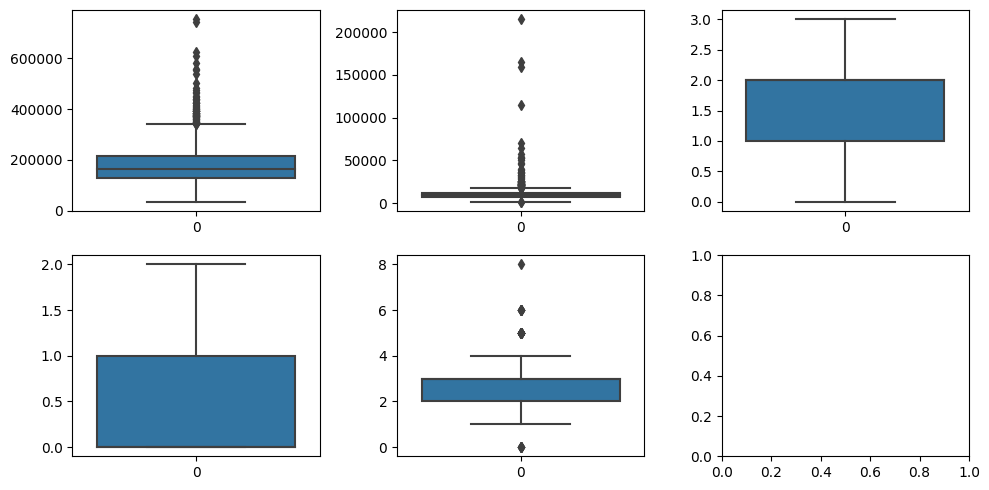

In [17]:
def detectOutliers(T):
    fig, axs = plt.subplots(2,3, figsize = (10,5))
    plt1 = sns.boxplot(T['SalePrice'], ax = axs[0,0])
    plt2 = sns.boxplot(T['LotArea'], ax = axs[0,1])
    plt3 = sns.boxplot(T['FullBath'], ax = axs[0,2])
    plt4 = sns.boxplot(T['HalfBath'], ax = axs[1,0])
    plt5 = sns.boxplot(T['BedroomAbvGr'], ax = axs[1,1])
    plt.tight_layout()
detectOutliers(train)

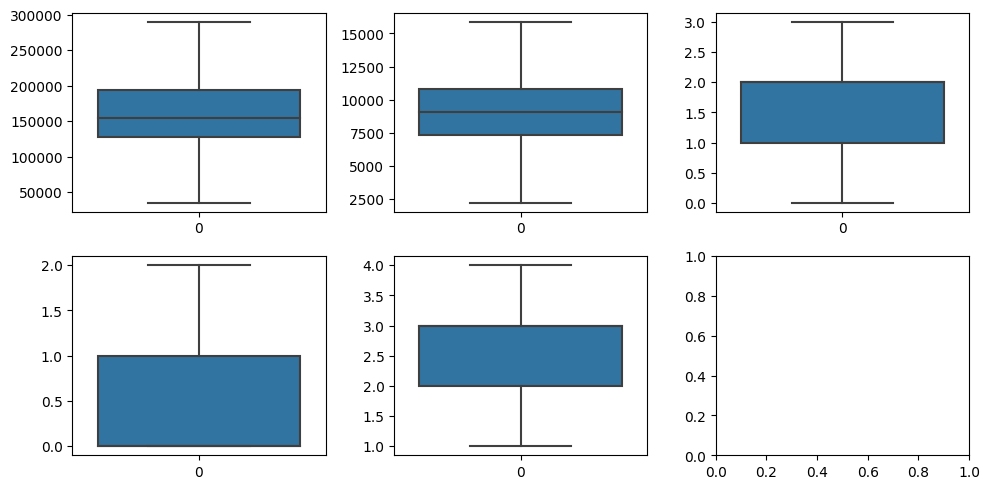

In [18]:
def IQR(T):
    # Outlier reduction for price
    Q1 = T.SalePrice.quantile(0.25)
    Q3 = T.SalePrice.quantile(0.75)
    IQR = Q3 - Q1
    T = T[(T.SalePrice >= Q1 - 1.5*IQR) & (T.SalePrice <= Q3 + 1.5*IQR)]
    
    # Outlier reduction for area
    Q1 = T.LotArea.quantile(0.25)
    Q3 = T.LotArea.quantile(0.75)
    IQR = Q3 - Q1
    T = T[(T.LotArea >= Q1 - 1.5*IQR) & (T.LotArea <= Q3 + 1.5*IQR)]

    # Outlier reduction for area
    Q1 = T.FullBath.quantile(0.25)
    Q3 = T.FullBath.quantile(0.75)
    IQR = Q3 - Q1
    T = T[(T.FullBath >= Q1 - 1.5*IQR) & (T.FullBath <= Q3 + 1.5*IQR)]

    # Outlier reduction for area
    Q1 = T.HalfBath.quantile(0.25)
    Q3 = T.HalfBath.quantile(0.75)
    IQR = Q3 - Q1
    T = T[(T.HalfBath >= Q1 - 1.5*IQR) & (T.HalfBath <= Q3 + 1.5*IQR)]

    # Outlier reduction for area
    Q1 = T.BedroomAbvGr.quantile(0.25)
    Q3 = T.BedroomAbvGr.quantile(0.75)
    IQR = Q3 - Q1
    T = T[(T.BedroomAbvGr >= Q1 - 1.5*IQR) & (T.BedroomAbvGr <= Q3 + 1.5*IQR)]
    return T
train=IQR(train)
train=IQR(train)
train=IQR(train)
train=IQR(train)
train=IQR(train)
train=IQR(train)
train=IQR(train)
train=IQR(train)
train=IQR(train)


detectOutliers(train)

In [19]:
train

,Id,SalePrice,LotArea,BedroomAbvGr,FullBath,HalfBath
0,1,208500,8450,3,2,1
1,2,181500,9600,3,2,0
2,3,223500,11250,3,2,1
3,4,140000,9550,3,1,0
4,5,250000,14260,4,2,1
...,...,...,...,...,...,...
1455,1456,175000,7917,3,2,1
1456,1457,210000,13175,3,2,0
1457,1458,266500,9042,4,2,0
1458,1459,142125,9717,2,1,0




# linear regression model

### create a linear regression model (train)

In [20]:
# Create a linear regression model
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['LotArea', 'BedroomAbvGr', 'FullBath' ,'HalfBath']])
y = np.asanyarray(train[['SalePrice']])
regr.fit(x, y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[ 5.06563305e+00 -7.64310797e+03  5.47729115e+04  2.60351926e+04]]
Intercept:  [47323.55459084]


### create a linear regression model (test)

In [21]:
# Predict SalePrice for test data
y_hat = regr.predict(test[['LotArea', 'BedroomAbvGr', 'FullBath' ,'HalfBath']])
test[['SalePrice']] = y_hat
x = np.asanyarray(test[['LotArea', 'BedroomAbvGr', 'FullBath' ,'HalfBath']])
y = np.asanyarray(sales[['SalePrice']])
# Evaluate the model
#print("Mean Squared Error (MSE): %.2f" % np.mean((y_hat - y) ** 2))
#print('Variance score: %.2f' % regr.score(x, y))
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Calculate R-squared and MSE
r_squared = r2_score(y, y_hat)
mse = mean_squared_error(y, y_hat)
mae = mean_absolute_error(y, y_hat)
print(f'R-squared: {r_squared}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

R-squared: -4.265322567837304
Mean Squared Error: 1435681399.0777478
Mean Absolute Error: 31285.186059401665


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/tmp/ipykernel_34/3437766806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[['SalePrice']] = y_hat


In [22]:
submission = pd.DataFrame(test[['Id','SalePrice']])

#Specify the file path to save data
csv_file_path = 'submission.csv'

# Write the DataFrame to a CSV file
submission.to_csv(csv_file_path, index=False)

#print(f"CSV file '{csv_file_path}' has been created successfully.")
